In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
import seaborn as sns
import matplotlib.font_manager as fm
%matplotlib inline

In [2]:
from matplotlib import font_manager

f_path = "/Library/Fonts/Arial Unicode.ttf"
font_manager.FontProperties(fname=f_path).get_name()

'Arial Unicode MS'

In [3]:
from matplotlib import rc
rc('font', family="Arial Unicode MS")

In [4]:
df_2019_url = './data_2019_seoultraffic.csv'
df_2020_url = './data_2020_seoultraffic.csv'
traffic_2019 = pd.read_csv(df_2019_url) #2019 지역별
traffic_2020 = pd.read_csv(df_2020_url) #2020 지역별

In [163]:
traffic_2019.tail(2)[['year','month','day','요일','구','총합','0','1','2','3','4','5','6','7','8','9','10','11','12','13',
              '14','15','16','17','18','19','20','21','22','23']]

,year,month,day,요일,구,총합,0,1,2,3,...,14,15,16,17,18,19,20,21,22,23
49273,2019,12,30,월,영등포구,110342,3199,2144,1541,1462,...,4993,4987,4852,4551,4281,5368,5603,5844,5857,5832
49274,2019,12,31,화,영등포구,108784,4978,3737,2699,1948,...,5188,4080,3566,3706,3345,4519,5544,5564,5815,5107


In [164]:
traffic_2020.tail(2)[['year','month','day','요일','구','총합','0','1','2','3','4','5','6','7','8','9','10','11','12','13',
              '14','15','16','17','18','19','20','21','22','23']]

,year,month,day,요일,구,총합,0,1,2,3,...,14,15,16,17,18,19,20,21,22,23
49408,2020,12,30,수,영등포구,97701,2696,1718,1247,1191,...,4893,4599,3792,3432,3340,4543,5158,5234,5217,4079
49409,2020,12,31,목,영등포구,96422,2905,1801,1363,1129,...,4619,3993,3539,3374,3071,4232,5270,4927,4889,3822


In [102]:
df_2019 = traffic_2019
df_2020 = traffic_2020

In [185]:
monthly_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2019    12 non-null     int64
dtypes: int64(1)
memory usage: 492.0 bytes


# 2019-2020 통행량 비교

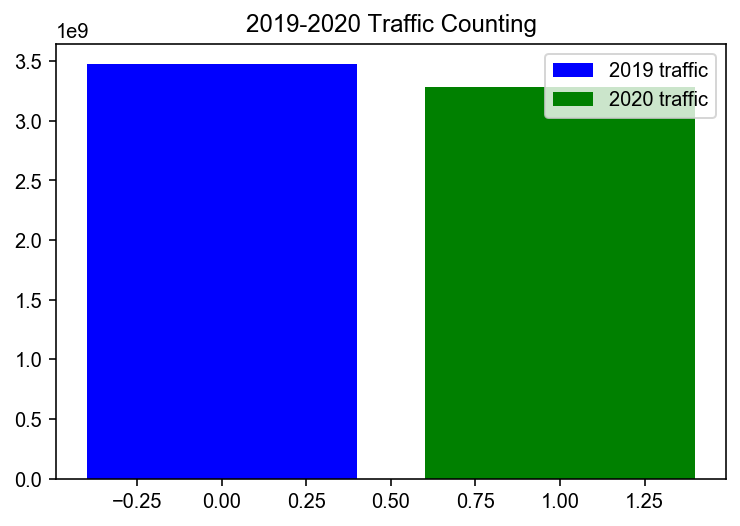

In [103]:
x1 = [0]
x2 = [1]
df_sum_2019 = pd.DataFrame(traffic_2019, columns=["총합"])
df_sum_2020 = pd.DataFrame(traffic_2020, columns=["총합"])

plt.bar(x1, df_sum_2019.sum(), label="2019 traffic", color='b')
plt.bar(x2, df_sum_2020.sum(), label="2020 traffic", color='g')
plt.legend()
plt.title("2019-2020 Traffic Counting")

plt.show()

# 2019-2020 월별 통행량 비교

In [167]:
monthly_2019 = df_2019["총합"].groupby([df_2019["month"],df_2019["year"]]).sum().unstack("year")
monthly_2019


year,2019
month,
1,293047880
2,255946482
3,291462852
4,294804467
5,301733907
6,285145303
7,292395939
8,294338097
9,274872597


In [ ]:
monthly_2020 = df_2020["총합"].groupby([df_2020["month"],df_2020["year"]]).sum().unstack("year")
monthly_2020

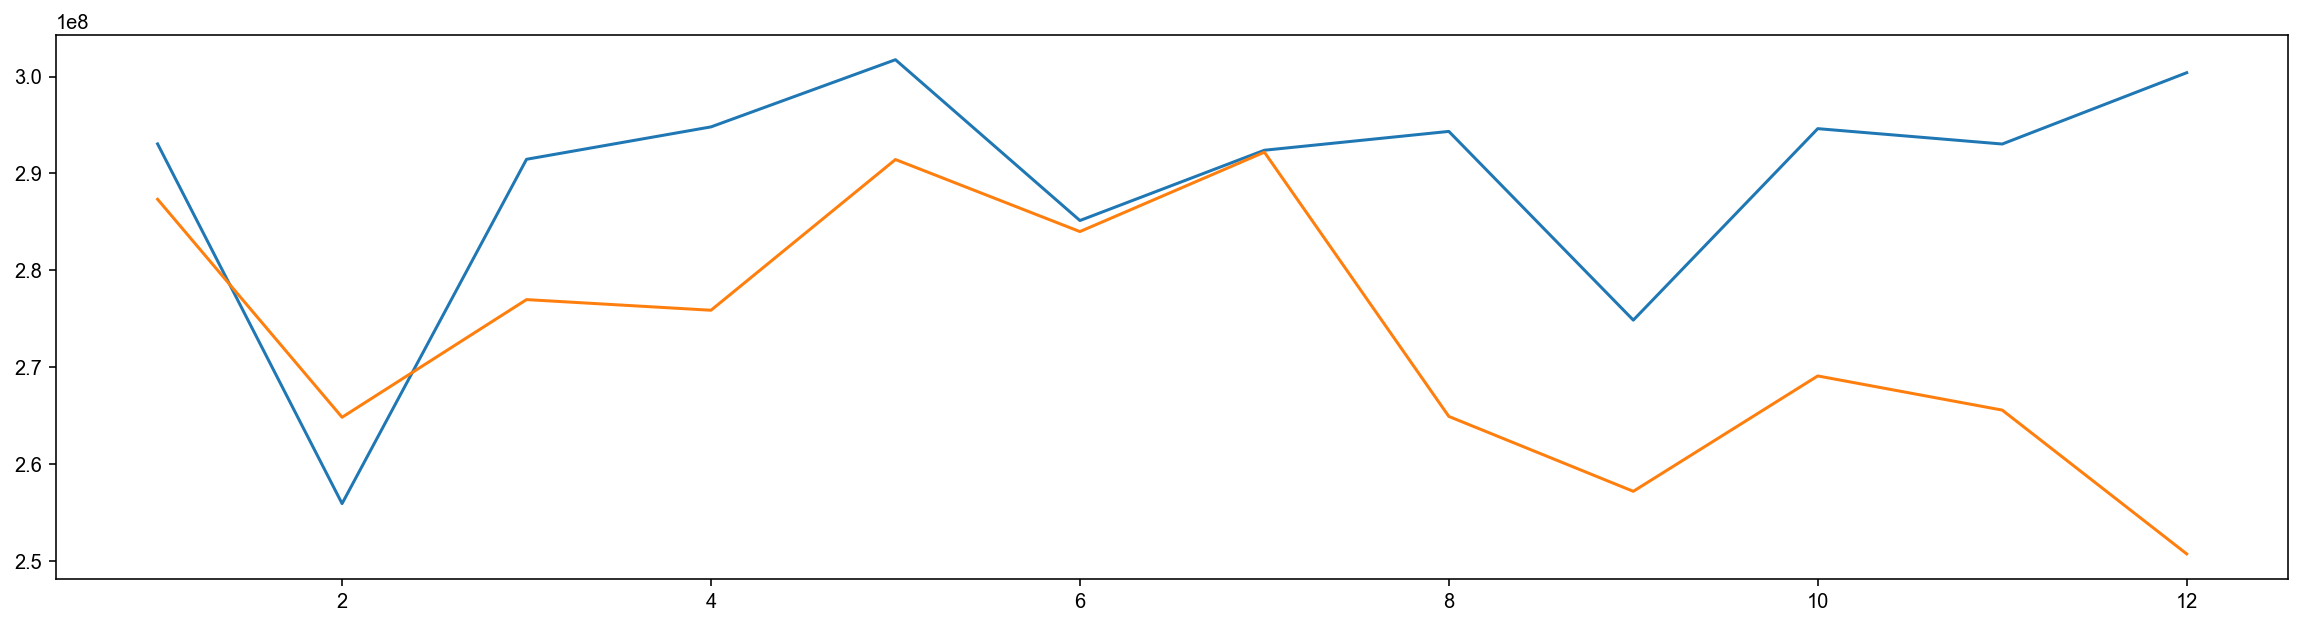

In [196]:
plt.figure(figsize=(20, 5))
plt.plot(x,monthly_2019)
plt.plot(x,monthly_2020)
plt.show()

# 요일별 통행량 비교(주말=토,일)

In [140]:
dayofthweek_2019 = df_2019["총합"].groupby([df_2019["요일"],df_2019["year"]]).sum().unstack("year")
dayofthweek_2019.loc[["토","일"]]

year,2019
요일,
토,492424776
일,433350226


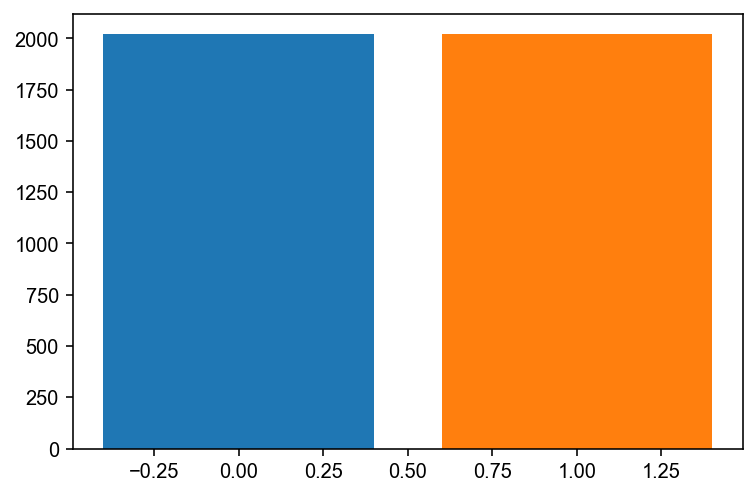

In [197]:
dayofthweek_2019 = df_2020["총합"].groupby([df_2019["요일"],df_2019["year"]]).sum().unstack("year")
sat_2019 = dayofthweek_2019.loc[["토"]]
sun_2019 = dayofthweek_2019.loc[["일"]]
plt.bar(x1, sat_2019)
plt.bar(x2, sun_2019)
plt.show()

In [200]:
dayofthweek_2020 = df_2020["총합"].groupby([df_2020["요일"],df_2020["year"]]).sum().unstack("year")
dayofthweek_2020.loc[["토","일"]]

year,2020
요일,
토,454937964
일,375774867


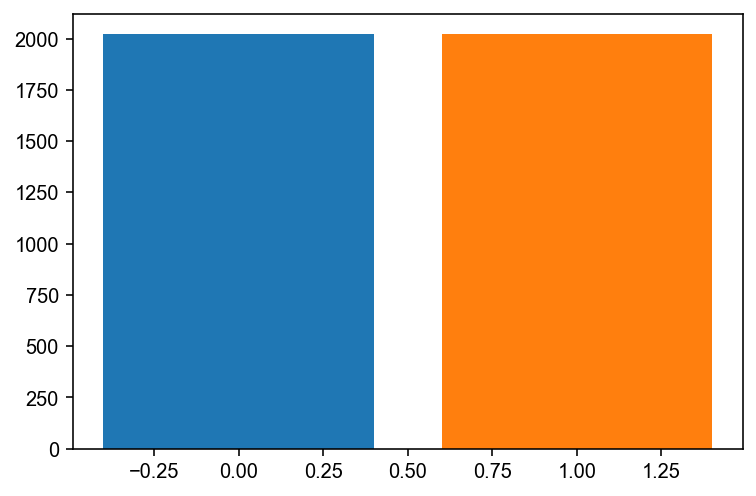

In [201]:
dayofthweek_2020 = df_2020["총합"].groupby([df_2020["요일"],df_2020["year"]]).sum().unstack("year")
sat_2020 = dayofthweek_2020.loc[["토"]]
sun_2020 = dayofthweek_2020.loc[["일"]]
plt.bar(0, sat_2020)
plt.bar(1, sun_2020)
plt.show()

# 요일별 통행량 (평일)

In [202]:
dayofthweek_2019 = df_2019["총합"].groupby([df_2019["요일"],df_2019["year"]]).sum().unstack("year")
dayofthweek_2019.loc[["월","화","수","목","금"]]

year,2019
요일,
월,495321251
화,509517933
수,527079819
목,492164038
금,521941567


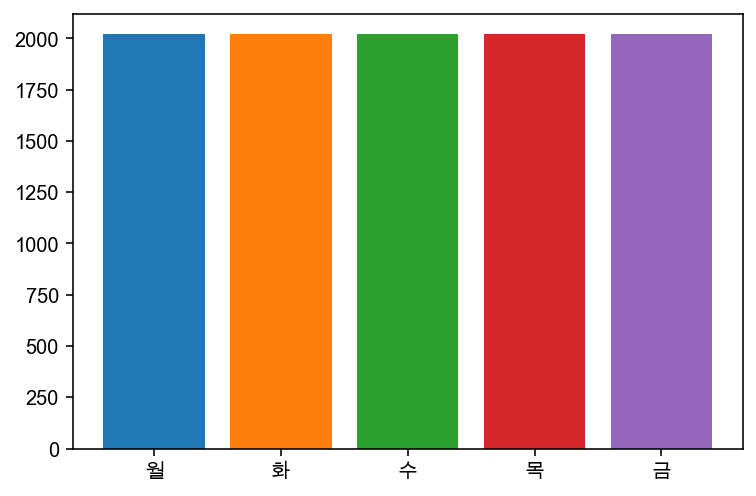

In [203]:
mon_2019 = dayofthweek_2019.loc[["월"]]
tue_2019 = dayofthweek_2019.loc[["화"]]
wed_2019 = dayofthweek_2019.loc[["수"]]
thu_2019 = dayofthweek_2019.loc[["목"]]
fri_2019 = dayofthweek_2019.loc[["금"]]

plt.bar("월", mon_2019)
plt.bar("화", tue_2019)
plt.bar("수", wed_2019)
plt.bar("목", thu_2019)
plt.bar("금", fri_2019)

plt.show()

In [204]:
dayofthweek_2020 = df_2020["총합"].groupby([df_2020["요일"],df_2020["year"]]).sum().unstack("year")
dayofthweek_2020.loc[["월","화","수","목","금"]]

year,2020
요일,
월,475181608
화,486640237
수,493765368
목,498696678
금,495326562


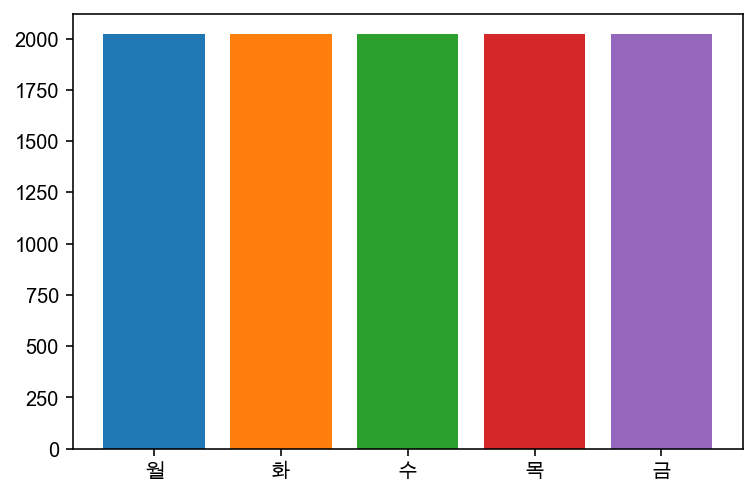

In [205]:
mon_2020 = dayofthweek_2020.loc[["월"]]
tue_2020 = dayofthweek_2020.loc[["화"]]
wed_2020 = dayofthweek_2020.loc[["수"]]
thu_2020 = dayofthweek_2020.loc[["목"]]
fri_2020 = dayofthweek_2020.loc[["금"]]

plt.bar("월", mon_2020)
plt.bar("화", tue_2020)
plt.bar("수", wed_2020)
plt.bar("목", thu_2020)
plt.bar("금", fri_2020)

plt.show()

# 지역별 통행량 비교(파이그래프)

In [108]:
df_2019 = traffic_2019
df_2019.pivot_table("총합","요일","구",aggfunc=np.sum)

구,강남구,강동구,강서구,과천시,관악구,광명시,광진구,구로구,구리시,금천구,...,은평구,종로구,중랑구,하남시,고양시,금천구,동대문구,서대문구,영등포구,중구
요일,,,,,,,,,,,,,,,,,,,,,
금,48807863,13960484,19505874,5198764,5421146,1824310,8019592,10789152,8270635,13305614,...,7391116,24221399,8736393,5540205,2363797,4211460,7410907,13613909,39254444,25581528
목,46149901,12663836,18238479,4730662,5146391,1684268,7581650,9973953,7688936,12557284,...,6882717,22773106,7899311,5120275,2202043,3829120,7108664,12795288,37168931,24114082
수,49648668,13357861,19589652,4947477,5400511,1817146,8027413,10762691,8291473,13456820,...,7453170,24428845,8562364,5528501,2366405,4106512,7582971,13733105,39964300,25603379
월,46475507,12881124,18145742,4561429,5049301,1719355,7502884,10177017,7909936,12925443,...,7088892,22572369,8208245,5116451,2310577,3859636,7189193,12840733,37138854,24300941
일,39494727,11834286,15618738,4266849,4489110,1415110,6289476,8572978,6931159,9904840,...,6358855,18995890,7353477,4116265,2243736,3104455,7257854,11384433,30733408,18310785
토,45497778,13560071,17934236,4863897,5228424,1678518,7519453,10253349,8339837,11904574,...,7318690,21676687,8395804,5008731,2407611,3939117,7783232,12771157,35721635,21660994
화,47970755,13118988,19003304,4931147,5272779,1754118,7784283,10440222,8143053,13265446,...,7219070,23536744,8125906,5249620,2335098,4000029,7305808,13295487,38680960,24953421


In [208]:
dayofthweek_2019 = df_2019["총합"].groupby([df_2019["요일"],df_2019["year"]]).sum().unstack("year")
dayofthweek_2019.loc[]

SyntaxError: invalid syntax (<ipython-input-208-6d890dbe50f2>, line 2)

In [109]:
df_2020 = traffic_2020
df_2020.pivot_table("총합","요일","구",aggfunc=np.sum)

구,강남구,강동구,강서구,과천시,관악구,광명시,광진구,구로구,구리시,금천구,...,은평구,종로구,중랑구,하남시,고양시,금천구,동대문구,서대문구,영등포구,중구
요일,,,,,,,,,,,,,,,,,,,,,
금,44621559,15069375,19713972,5051157,5706105,1552892,8055781,10554606,8954685,12019106,...,7864795,22417232,7660903,5413119,2369722,4449859,7239668,11089346,34440480,21709305
목,45107314,14614140,19487492,5200669,5688605,1551823,8159467,10582575,8868321,12120522,...,7746200,22563920,7767270,5393444,2403667,4377089,7228210,11065801,35135876,21791661
수,44653803,14155599,19157228,5225570,5625049,1534045,8005018,10462434,8728344,12001947,...,7655975,22403749,7671622,5353814,2309830,4218902,7270597,11010418,34805041,21686383
월,42965594,13915394,18930255,4989791,5432640,1451431,7602667,10194094,8211899,11594313,...,7230635,21482828,7442737,5213155,2224459,4149803,6890841,10391158,33281440,20805495
일,33097163,11629133,14418128,3873366,4427446,1048020,5501930,7712160,6686731,8046940,...,6292064,15761502,6131851,3707861,2047928,2939924,6649092,8246957,24196664,13097404
토,40119800,13811933,17908868,4612170,5374149,1362357,7259733,9727887,8250699,10340937,...,7658275,19755020,7236754,4796939,2293688,3948394,7539973,10034496,30285667,17064856
화,44026889,13863748,19117481,5322047,5595306,1487815,7945528,10378316,8347891,11850925,...,7410278,22227012,7420694,5265983,2338760,4272198,7101298,10849328,34435148,21590337
